# Case Study on Brazil Housing

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation
import warnings
warnings.filterwarnings('ignore')

In [2]:

data = pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')

df1 = pd.DataFrame(data)
df1

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
df1.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

NO Null Values!! 

### **Removing the data of São Paulo and Rio de Janeiro from the data as the people in those two cities want to relocate to other remaining cities in the data.

In [4]:
df = df1[(df1['city'] != 'São Paulo') & (df1['city'] != 'Rio de Janeiro')]
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419


In [5]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:               
        if df[column].nunique() < 36:       
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)        

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

### User-defined function for level 1 analysis of categorical columns
This function will check for the following: \
Unique values \
Mode \
Total count of missing values
Graphs to better understand the data

In [6]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") 
    print(f"Mode of {col} is {df[col].mode()[0]}") 
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}")
      

## 1. Analysis of City Column

In [7]:
info_of_cat("city")

Unique values in city are: ['Porto Alegre' 'Campinas' 'Belo Horizonte']
Mode of city is Belo Horizonte
Number of missing values in city is 0


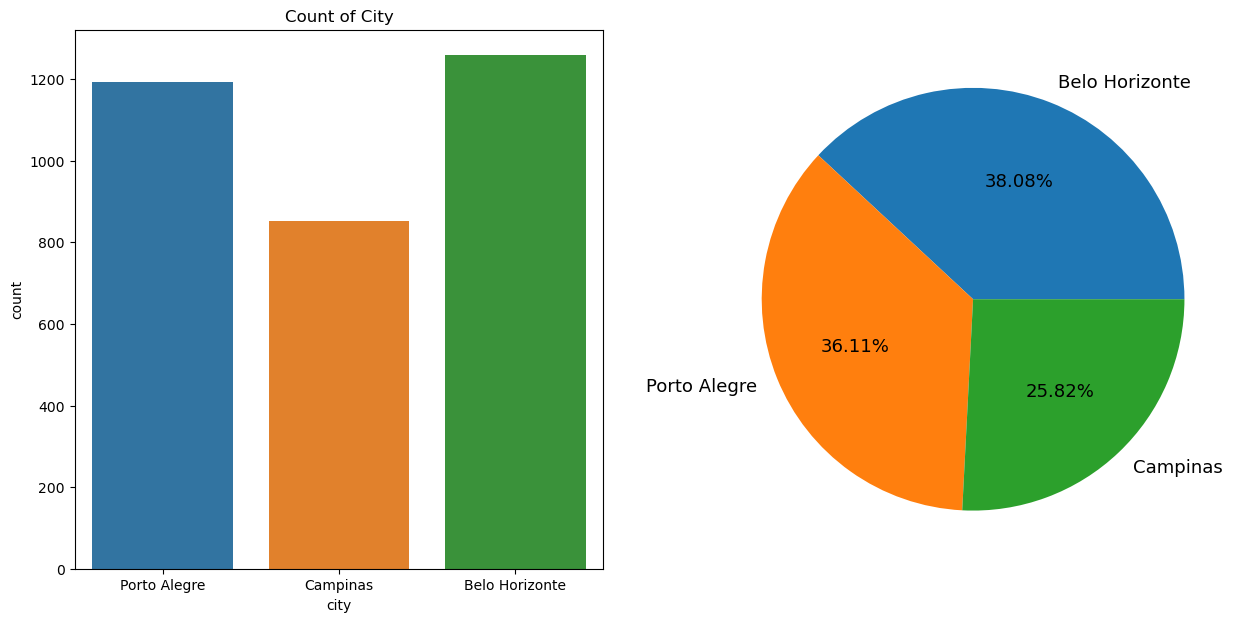

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of City")                  
percentage = df["city"].value_counts()         
labels = list(df["city"].value_counts().index) 

sns.countplot(x = df["city"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Relocation options from Sao Paulo and Rio de Janeiro are more in Belo Horizonte City and Porto Alegre compared to Campinas city

## 2. Analysis of rooms Column

In [9]:
info_of_cat("rooms")

Unique values in rooms are: [ 1  2  4  3  5  6  7 10  8]
Mode of rooms is 2
Number of missing values in rooms is 0


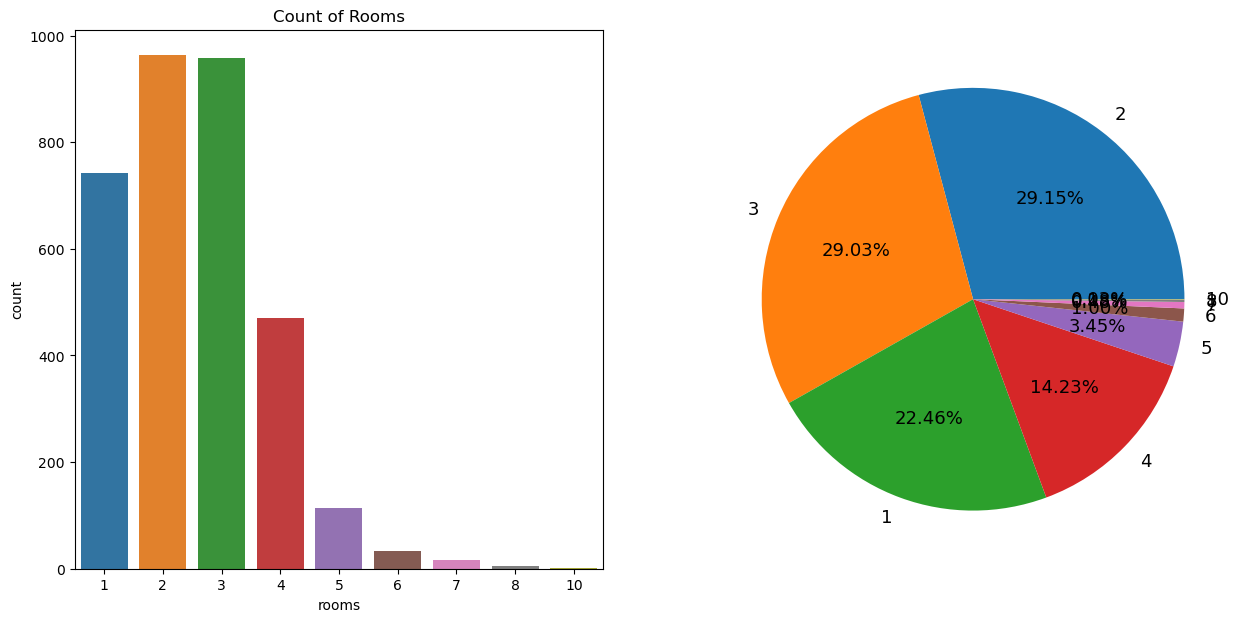

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Rooms")                  
percentage = df["rooms"].value_counts()         
labels = list(df["rooms"].value_counts().index) 

sns.countplot(x = df["rooms"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Availability of 2-3 rooms are more which is suitable for  Mid-sized Families

## 3. Analysis of bathroom Column

In [11]:
info_of_cat("bathroom")

Unique values in bathroom are: [ 1  6  2  3  4  7  5  8 10]
Mode of bathroom is 1
Number of missing values in bathroom is 0


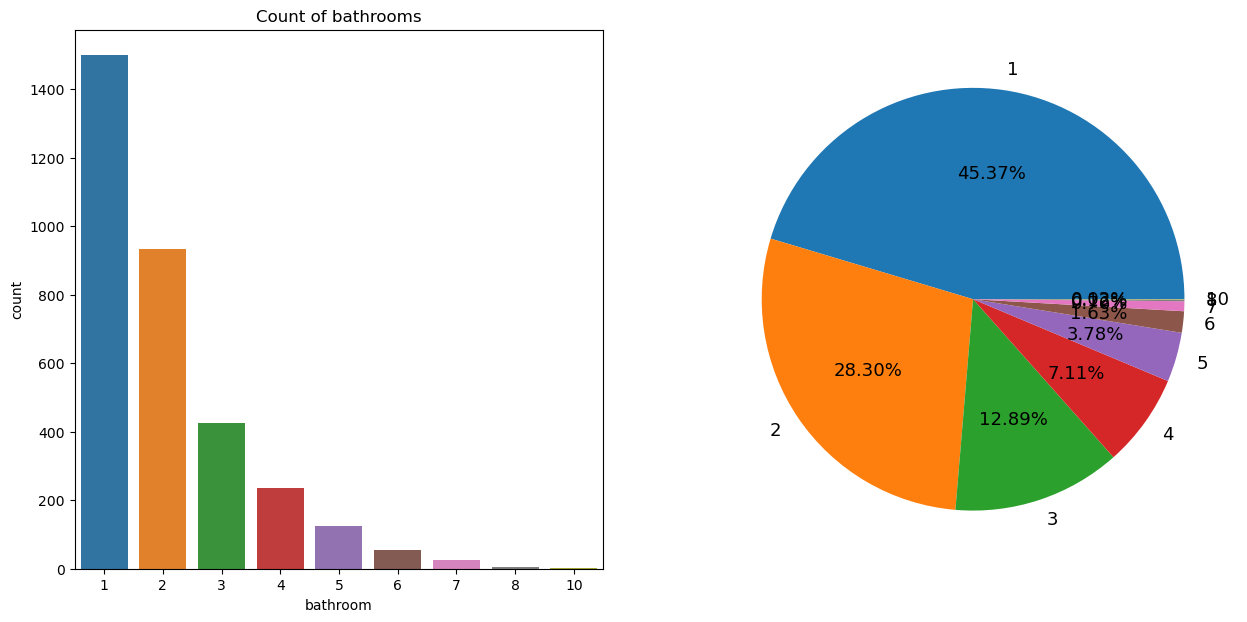

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of bathrooms")                  
percentage = df["bathroom"].value_counts()         
labels = list(df["bathroom"].value_counts().index) 

sns.countplot(x = df["bathroom"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Availability of 1-3 bathrooms are more which is suitable for Bachelors and Mid-sized Families

## 4. Analysis of Parking Spaces Column

In [13]:
info_of_cat("parking spaces")

Unique values in parking spaces are: [1 0 6 4 2 3 8 5 7]
Mode of parking spaces is 1
Number of missing values in parking spaces is 0


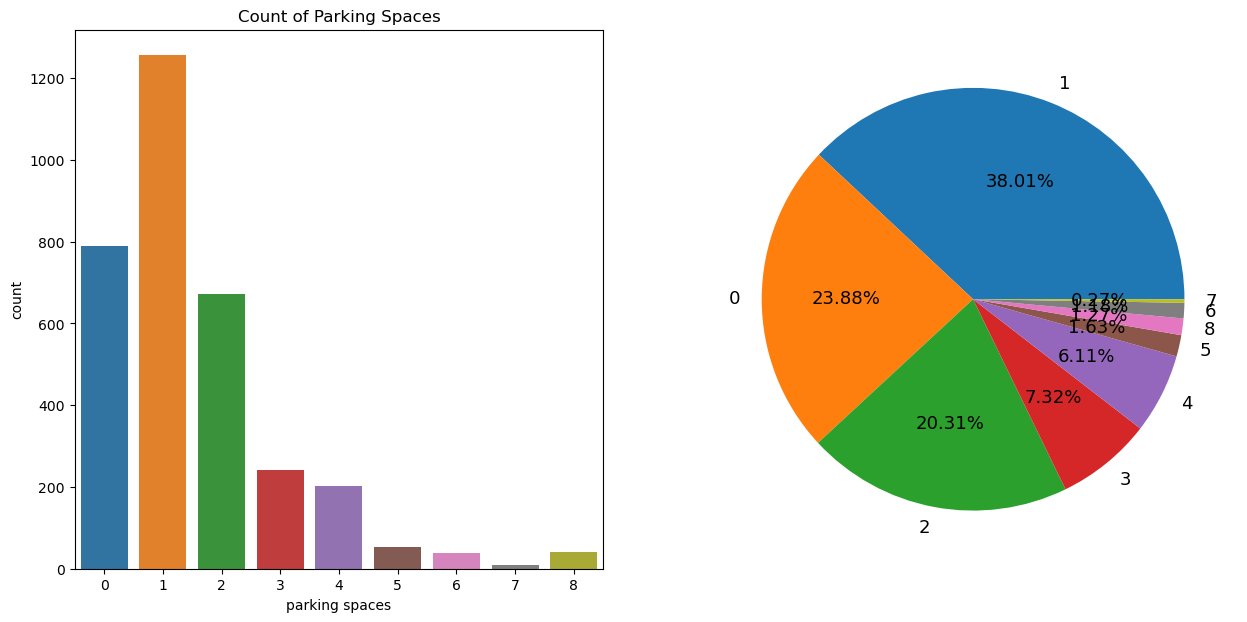

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Parking Spaces")                  
percentage = df["parking spaces"].value_counts()         
labels = list(df["parking spaces"].value_counts().index) 

sns.countplot(x = df["parking spaces"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Availability of 0-1 parking space is more which is suitable for Bachelors.
Mid-sized Families also have a decent amount of availability with some of the properties offering 2 parking spaces.

## 5. Analysis of Floors  Column

In [15]:
info_of_cat("floor")

Unique values in floor are: [  6   2  10   0  17  11   7   5  13   1   9   3   4   8  14  16  12  22
  19  20  15  18 301  26  21  29  51  23]
Mode of floor is 0
Number of missing values in floor is 0


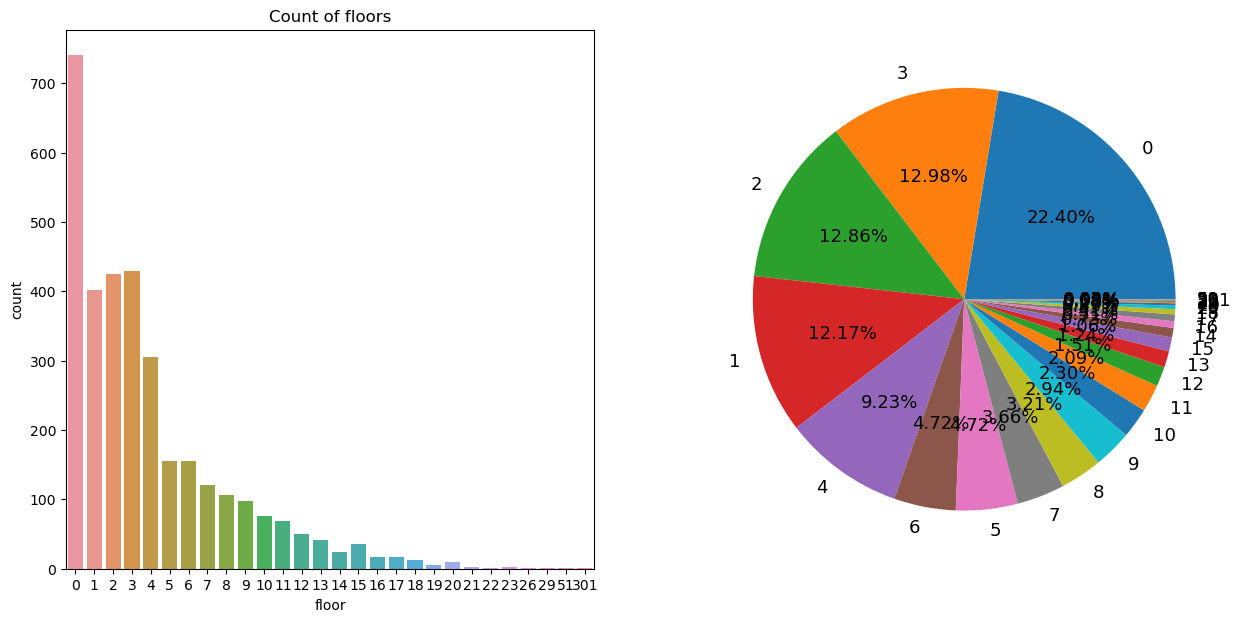

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of floors")                  
percentage = df["floor"].value_counts()         
labels = list(df["floor"].value_counts().index) 

sns.countplot(x = df["floor"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Availability of 0 floors/Ground Floor is more which is suitable for  Mid-sized Families and Large Families with kids as they dont have to take the hassle of climbing the stairs.
For Bachelors its an added advatange though they dont necessarily need it. However, they can choose between 1-4 floors as the availability is in good number compared to higher than 5 floors.

## 6. Analysis of Animal(Pets allowed or not) Column

In [17]:
info_of_cat("animal")

Unique values in animal are: ['acept' 'not acept']
Mode of animal is acept
Number of missing values in animal is 0


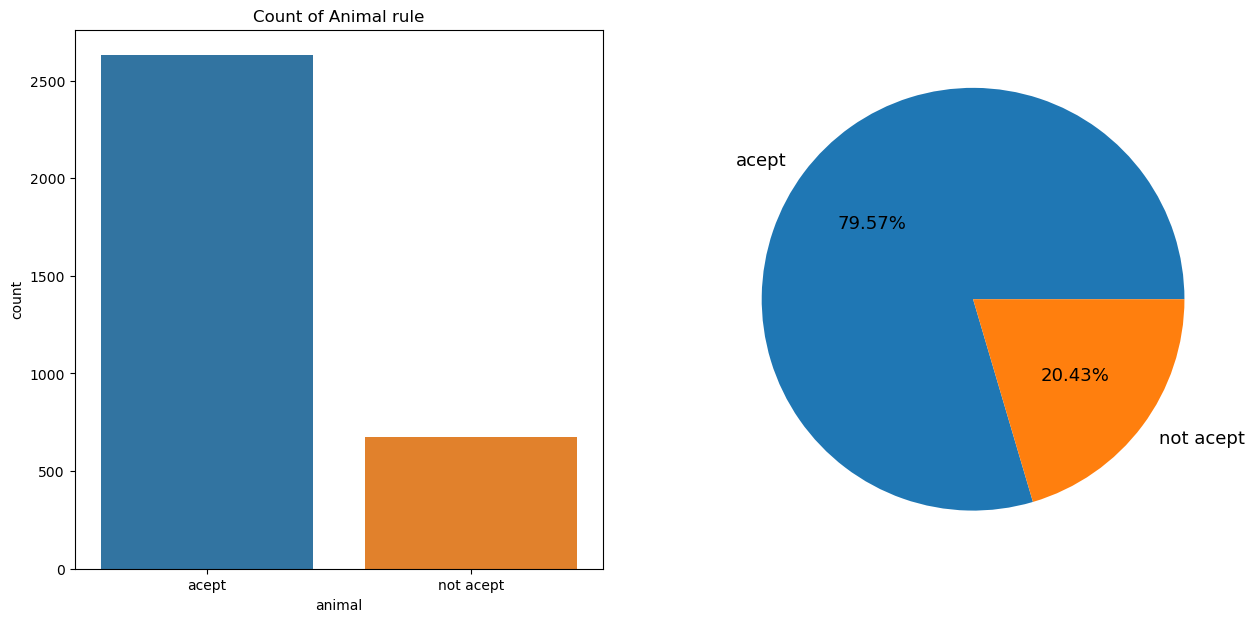

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Animal rule")                  
percentage = df["animal"].value_counts()         
labels = list(df["animal"].value_counts().index) 

sns.countplot(x = df["animal"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Dataset suggests that most of the properties accept Animals/Pets.

This is completely a personal choice whether or not to have a pet. Choosing an Animal friendly property while relocating is good if the family wants to get pets later in the future.

## 7. Analysis of Furnish Column

In [19]:
info_of_cat("furniture")

Unique values in furniture are: ['not furnished' 'furnished']
Mode of furniture is not furnished
Number of missing values in furniture is 0


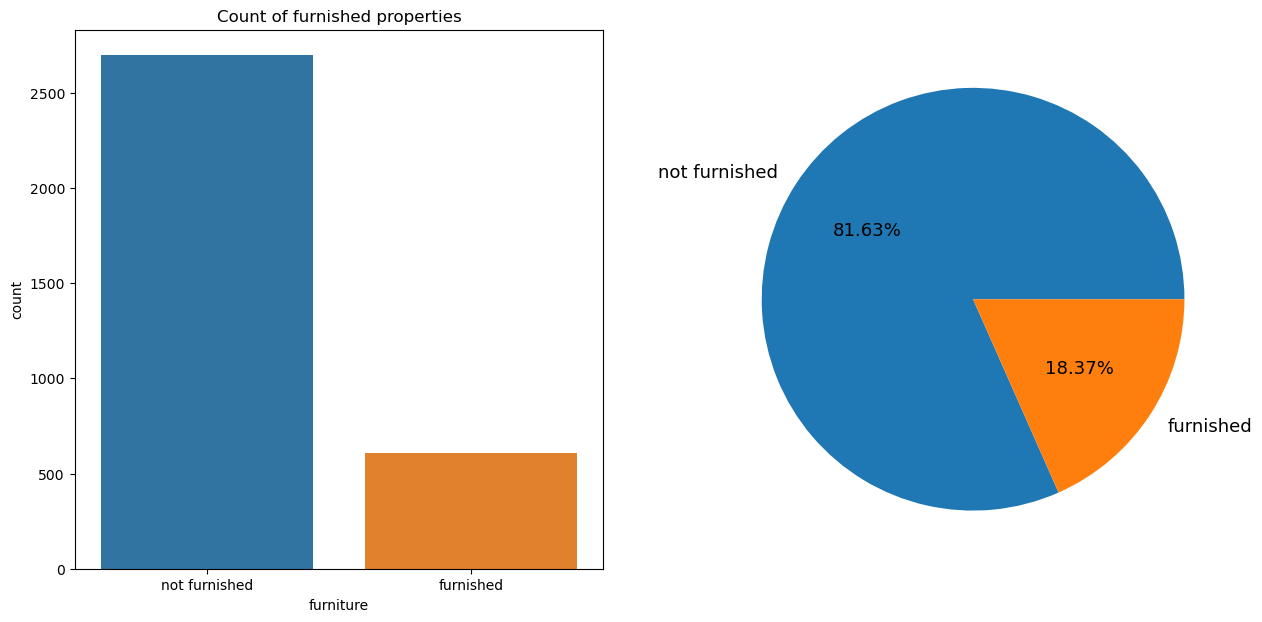

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of furnished properties")                  
percentage = df["furniture"].value_counts()         
labels = list(df["furniture"].value_counts().index) 

sns.countplot(x = df["furniture"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%", textprops ={'fontsize': 13})  

plt.show()

###### Most of the properties are not furnished and these properties could be suitable for Bachelors.
However, if Mid-sized and Large Families are choosing to furnish according to their own preferences, they can choose one of these properties too. Or, they can go for furnished ones though the options are less.

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical \ Variables$$

## User defined function for calculating mean, median, mode,  standard deviation, count of all null values.

In [21]:
from scipy.stats import skew

def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

## 1.  Analysis of Area Codes Column


In [22]:
info_of_numerical("area")

The mean of the area is 151.89769975786925
The median of the area is 80.0
The mode of the area is 70
The standard deviation of the area is 844.549115817972
Number of missing values in the area is 0


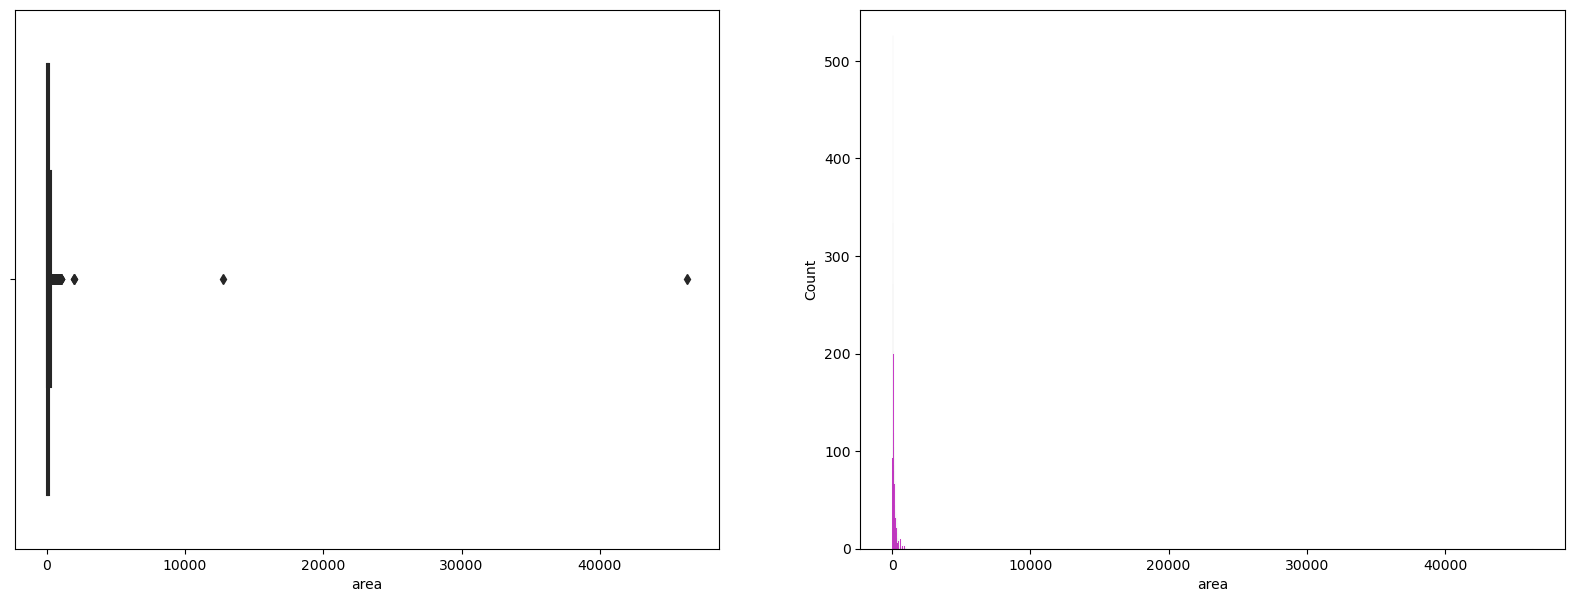

In [23]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["area"], ax =ax[1], color = "m")  
sns.boxplot(x = df["area"], ax = ax[0], color = "g")
plt.show()

###### This is the Area Code column and there is no point in performing outlier removal as the area codes does not affect the data in any way.
Customer can choose any area code that is suitable for them.

## 2.  Analysis of Home Owner Association Tax Column


In [24]:
info_of_numerical("hoa (R$)")

The mean of the hoa (R$) is 1224.822033898305
The median of the hoa (R$) is 366.5
The mode of the hoa (R$) is 0
The standard deviation of the hoa (R$) is 27477.762415061632
Number of missing values in the hoa (R$) is 0


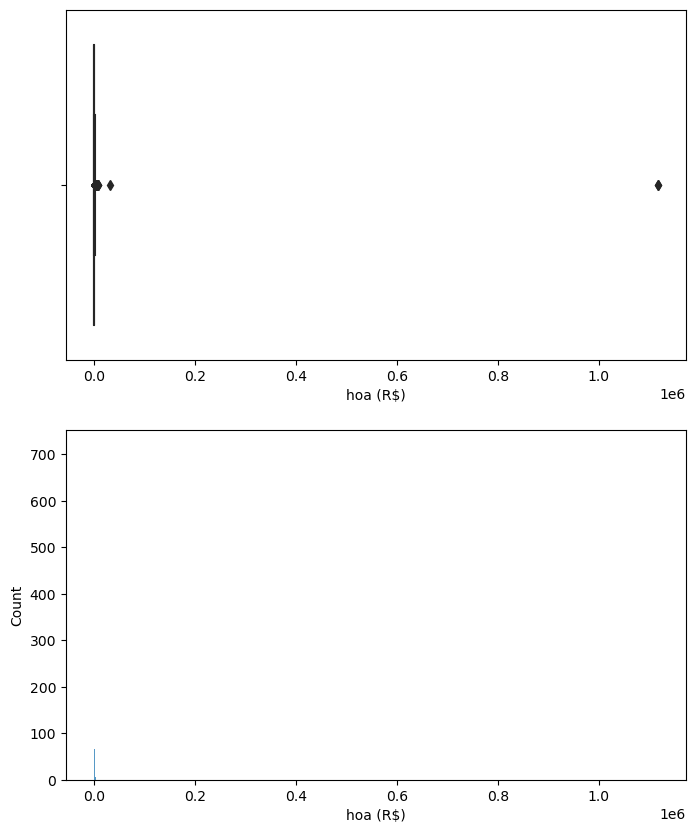

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))               
sns.histplot(x = df["hoa (R$)"], ax =ax[1], palette = "Set2")  
sns.boxplot(x = df["hoa (R$)"], ax = ax[0], color = "g")
plt.show()

## Outliers Analysis and Treatment: Because of Human Error in the data
Some of the House Owner Tax is 1117000 which is practically not possible and could be a human error in the dataset. Replacing greater than 5000 HOA with mean of the column.

In [26]:
mean = int(df['hoa (R$)'].mean())
# accessing the data higher than 5000
x = df[df["hoa (R$)"] > 5000].index
for index in x:
    df.loc[index, "hoa (R$)"] = mean

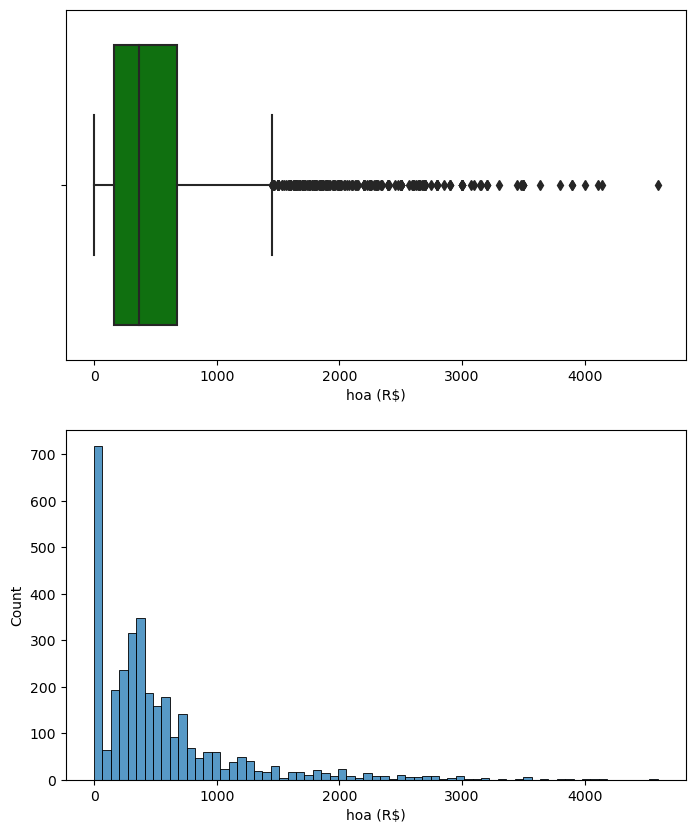

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))             
sns.histplot(x = df["hoa (R$)"], ax =ax[1], palette = "cubehelix")  
sns.boxplot(x = df["hoa (R$)"], ax = ax[0], color = "g")
plt.show()

## Outliers Analysis
This is a right skewed data but we can infer that maximum number of properties charge HOA between 0 to 1000 while some of the properties charge an absurb amount of 3000 to 4000 which is on the expensive side.

## 3.  Analysis of Rent Amount Column


In [28]:
info_of_numerical("rent amount (R$)")

The mean of the rent amount (R$) is 2849.6032082324455
The median of the rent amount (R$) is 1800.0
The mode of the rent amount (R$) is 1200
The standard deviation of the rent amount (R$) is 2859.528061327034
Number of missing values in the rent amount (R$) is 0


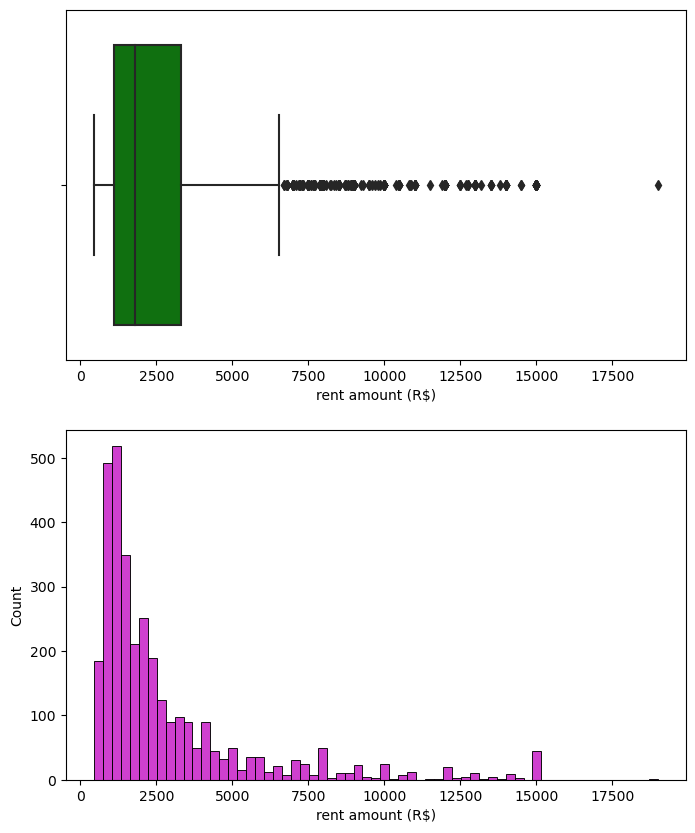

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))              
sns.histplot(x = df["rent amount (R$)"], ax =ax[1], color = "m")  
sns.boxplot(x = df["rent amount (R$)"], ax = ax[0], color = "g")
plt.show()

## Outliers Analysis
This is a right skewed data but the strengh of the outlier has increased at the end of the tail which indicates that one or few of the properties are charginig an hefty amount of rent to the tenants. Removing the outlier is not an ideal choice here as we will be removing those properties if we do outlier treatment. 

###### If Large Families have a higher budget and need a luxurious property to occupy, they can choose the properties that are towards the end of the tail. 
Hence, not removing the outlier to keep the options open to tenants.

## 4.  Analysis of Property Tax Column


In [30]:
info_of_numerical("property tax (R$)")

The mean of the property tax (R$) is 186.76452784503633
The median of the property tax (R$) is 86.0
The mode of the property tax (R$) is 0
The standard deviation of the property tax (R$) is 361.6002081116756
Number of missing values in the property tax (R$) is 0


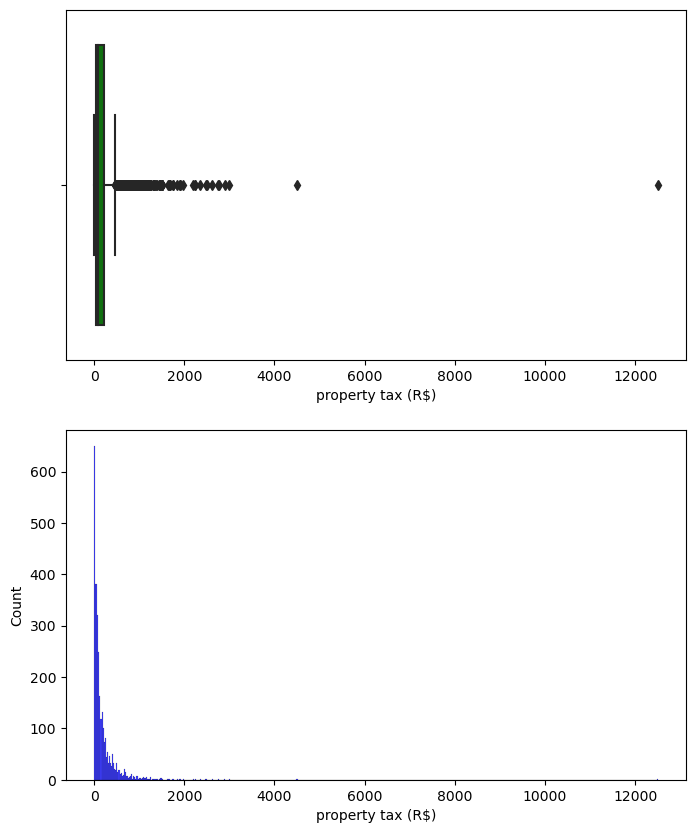

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))              
sns.histplot(x = df["property tax (R$)"], ax =ax[1], color = "b")  
sns.boxplot(x = df["property tax (R$)"], ax = ax[0], color = "g")
plt.show()

## Outliers Analysis and Treatment:

Customers do not wish to pay more taxes and the very reason they are moving out of Sao Paulo and Ria De Janeiro is because of high cost of living. Hence, Removing the high tax outlier from the data. Whether it is a human error or not, removing this outlier would benefit the customer.

In [32]:
mean = int(df['property tax (R$)'].mean())
# accessing the data higher than 4000
x = df[df["property tax (R$)"] > 4000].index
for index in x:
    df.loc[index, "property tax (R$)"] = mean

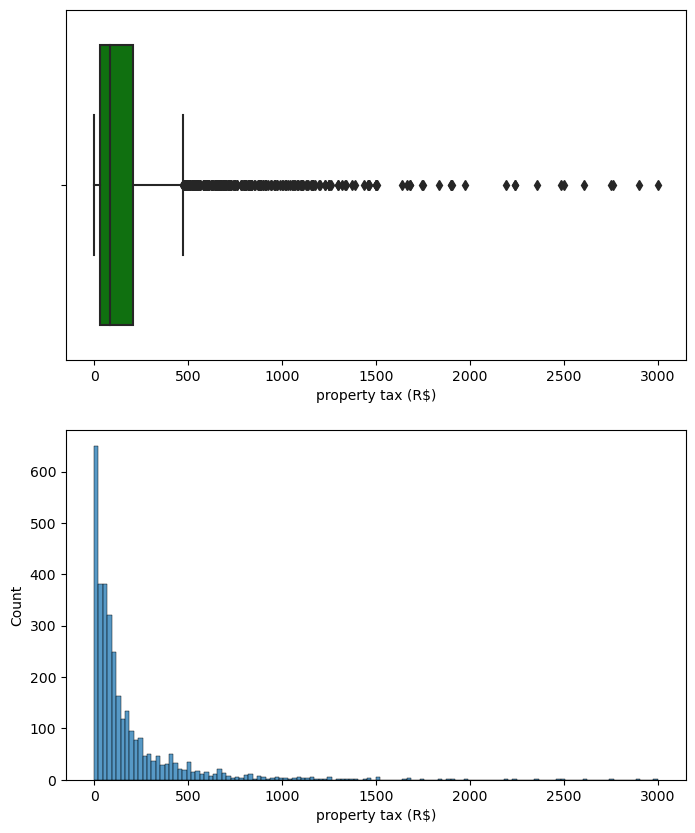

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))               
sns.histplot(x = df["property tax (R$)"], ax =ax[1], palette = "mako")  
sns.boxplot(x = df["property tax (R$)"], ax = ax[0], color = "g")
plt.show()

## Outliers Analysis
This is a right skewed data. Extreme outlier could be a human error and it has been replaced with mean of the column. And, some of the outliers are left in the data assuming the taxes are legitimate. Most of the tenants have to pay Property Tax between 0-500.

## 5.  Analysis of Fire Insurance Column


In [34]:
info_of_numerical("fire insurance (R$)")

The mean of the fire insurance (R$) is 41.95127118644068
The median of the fire insurance (R$) is 25.0
The mode of the fire insurance (R$) is 14
The standard deviation of the fire insurance (R$) is 44.134503754264465
Number of missing values in the fire insurance (R$) is 0


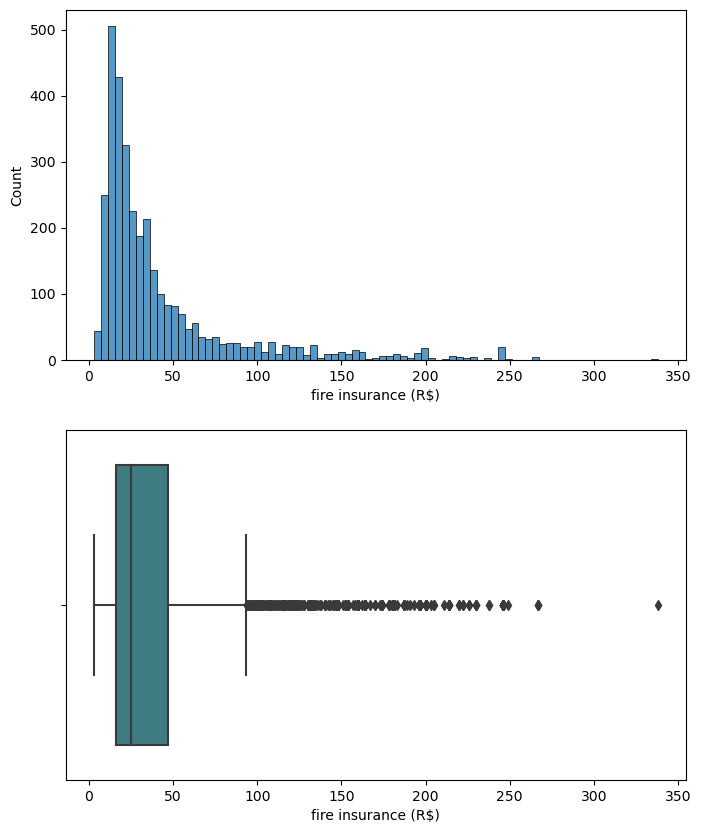

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))              
sns.histplot(x = df["fire insurance (R$)"], ax =ax[0], palette = "magma")  
sns.boxplot(x = df["fire insurance (R$)"], ax = ax[1], palette = "crest")
plt.show()

## Outliers Analysis
This is a right skewed data. Outlier is not being removed here as the Fire Insurance does not feel like human error in the dataset and can vary depending on the city and state, the tenants chooses to move in.

## 6.  Analysis of Total Cost Column


In [36]:
info_of_numerical("total (R$)")

The mean of the total (R$) is 4303.3265738498785
The median of the total (R$) is 2348.0
The mode of the total (R$) is 2633
The standard deviation of the total (R$) is 27679.63993475239
Number of missing values in the total (R$) is 0


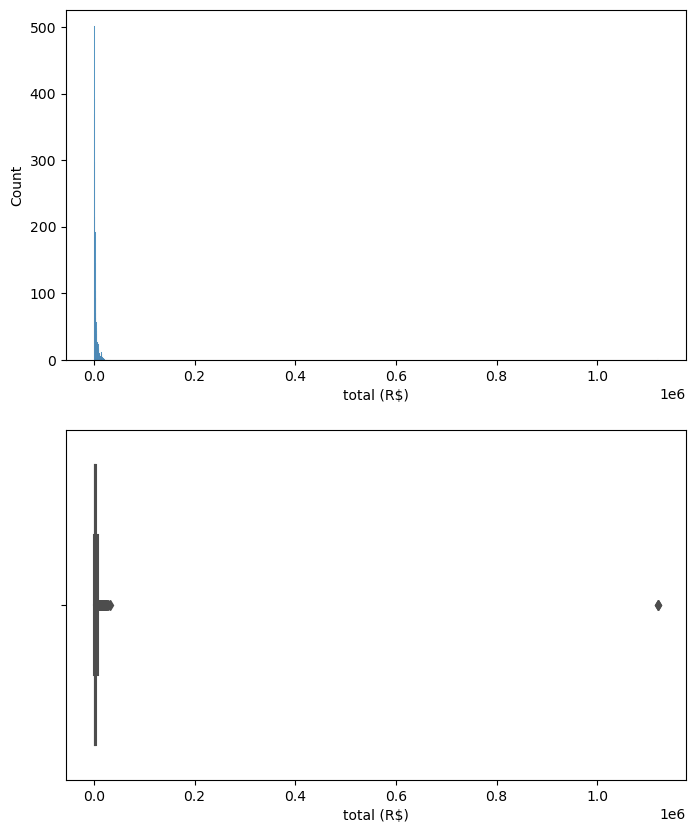

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))               
sns.histplot(x = df["total (R$)"], ax =ax[0], palette = "coolwarm")  
sns.boxplot(x = df["total (R$)"], ax = ax[1], palette = "flare")
plt.show()

## Outliers Analysis and Treatment: Because of Human Error in the data in House Owner association tax column shown above
Some of the House Owner Tax is 1117000 which is practically not possible and could be a human error in the dataset. This tax is messing up the Total cost column. Hence removing this extreme outlier.

In [38]:
mean = int(df['total (R$)'].mean())
# accessing the data higher than 30000
x = df[df["total (R$)"] > 30000].index
for index in x:
    df.loc[index, "total (R$)"] = mean

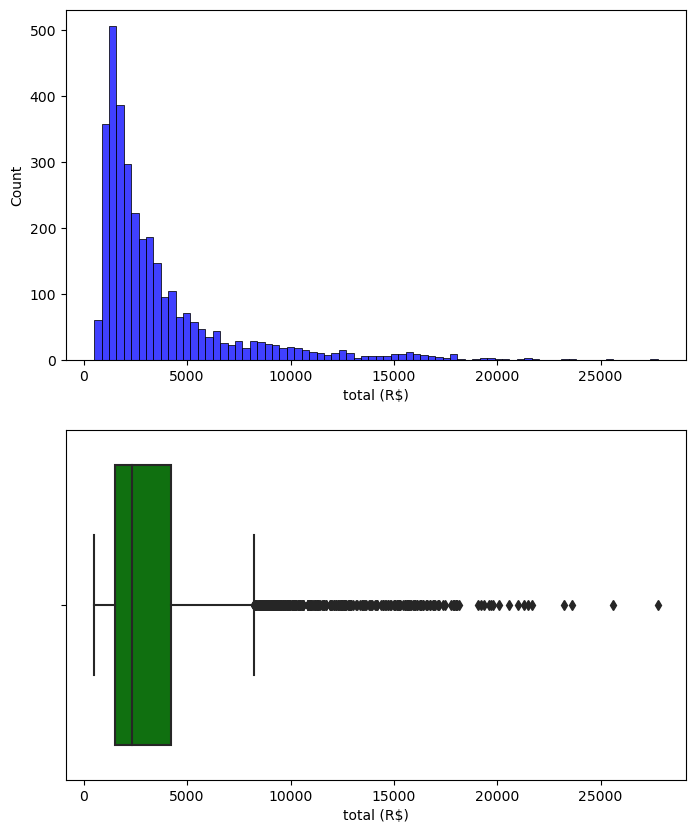

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))               
sns.histplot(x = df["total (R$)"], ax =ax[0], color = "b")  
sns.boxplot(x = df["total (R$)"], ax = ax[1], color = "g")
plt.show()

## Outliers Analysis
This is a right skewed data. Its is best to choose properties of total cost between 1000 to 10000 as it is the most economical option compared to the prices towards the end of the tail.

# Level-2 Bi-Variate Analysis

In [40]:
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


## Q1. Relationship of City with Rooms


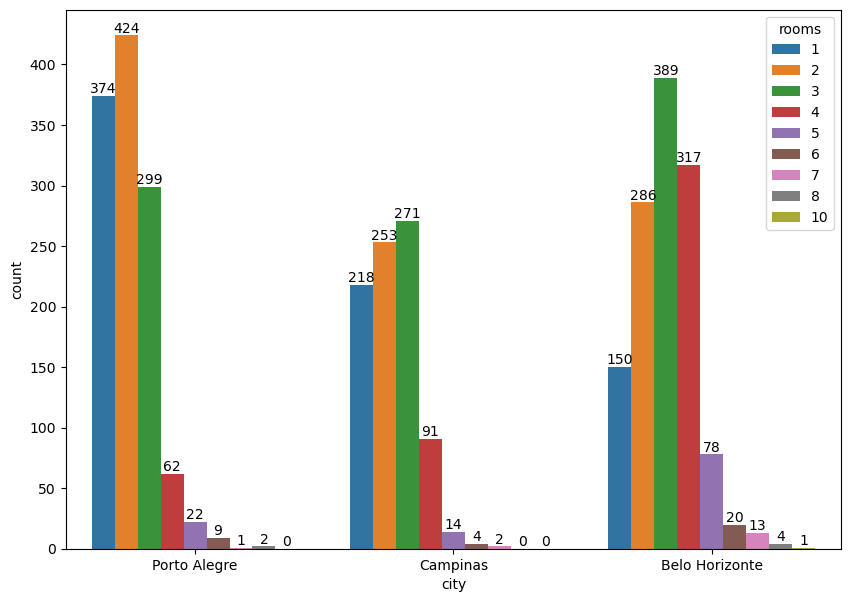

In [41]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "rooms", data = df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

### ***Interpretation: Porto Alegre has more 1-2 room options which is suitable for Bachelors and Mid-sized Families.

### Belo Horizonte has more 2-4 room options which is suitable for some Mid-Sized families as well as Decently Large Families.

### Belo Horizonte also has lot of 5+ room options for Large Families.

## Q2. Relationship of City with bathrooms


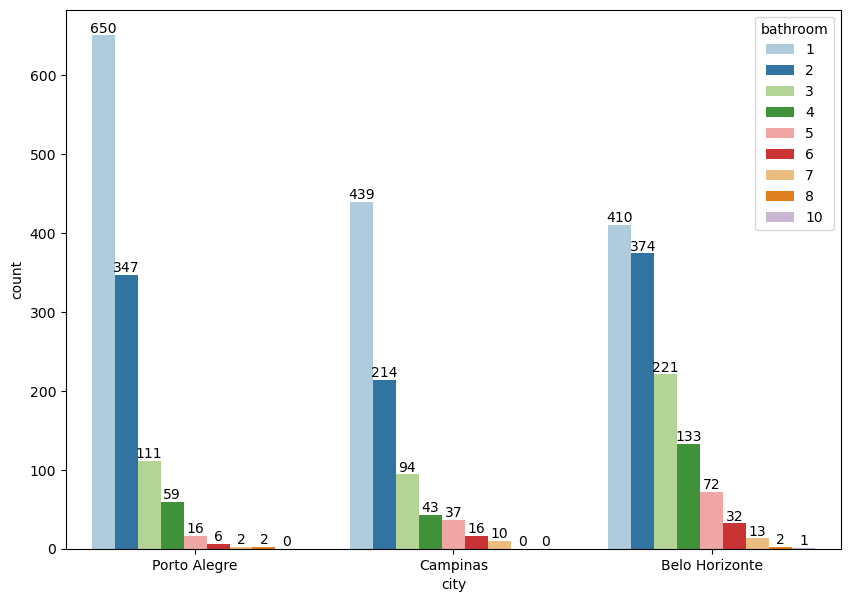

In [42]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "bathroom", data = df, palette = 'Paired')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

### ***Interpretation: Porto Alegre has more 1-2 bathroom options which is suitable for Bachelors and Mid-sized Families.

### Belo Horizonte has more 3-4 bathroom options which is suitable for some Mid-Sized families as well as Decently Large Families.

### Belo Horizonte also has lot of 5+ bathroom options for Large Families.

### Based on Bathrooms:
###### Porto Alegre is best suitable for Bachelors
###### Campinas city and Belo Horizonte are the two city options for Mid Sized Families
###### Belo Horizonte is best for Large Families

## Q3. Relationship of City with Parking Spaces


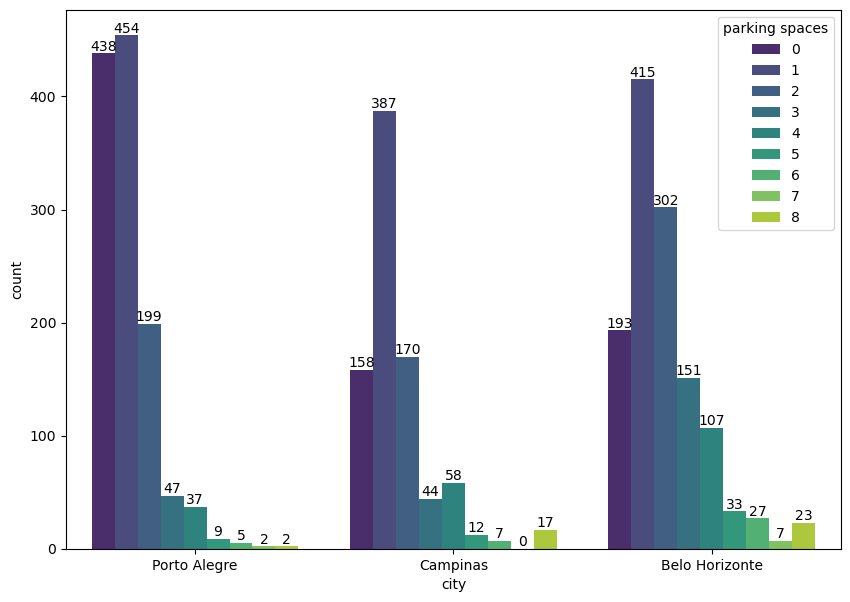

In [43]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "parking spaces", data = df, palette = 'viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

### ***Interpretation: Porto Alegre has more 0-1 parking space options which is suitable for Bachelors

### Campinas city has balanced 1-3 parking space options which is suitable for Mid-Sized families.

### Belo Horizonte also has lot of 4+ parking space options for Large Families.

### Based on Parking Spaces:
###### Porto Alegre is best suitable for Bachelors
###### Campinas city and Belo Horizonte are the two city options for Mid Sized Families
###### Belo Horizonte is best for Large Families

## Q3. Relationship of City with Animal Rule


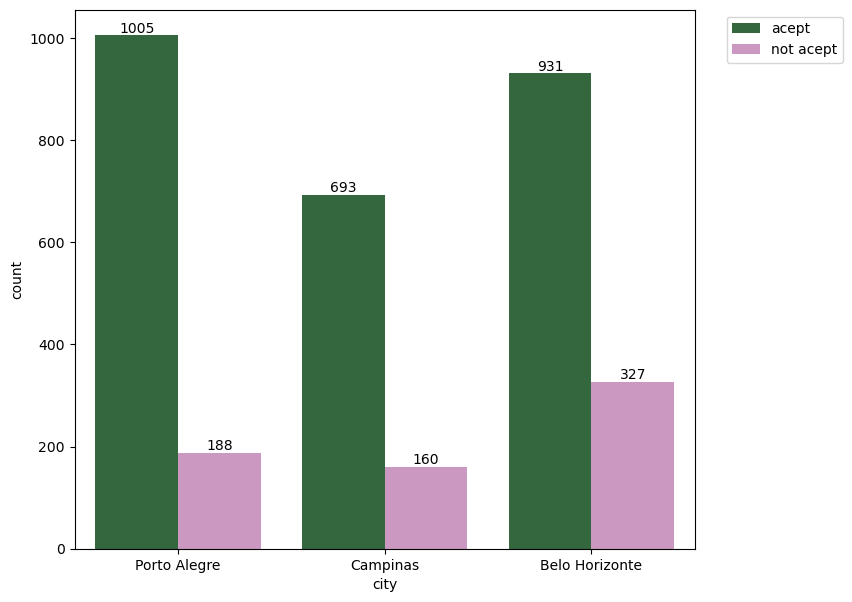

In [44]:
fig, ax = plt.subplots(figsize = (8, 7))
sns.countplot(x = "city", hue = "animal", data = df, palette = 'cubehelix')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.legend(bbox_to_anchor =(1.25, 1))
plt.show()

### ***Interpretation: Porto Alegre is more Pet Friendly and is best suited for Bachelors.

### Campinas city is a balanced city and can be suitable for both Bachelors and Mid-Sized Families.

### Belo Horizonte is an extreme city where most properties are not pet friendly and some properties are pet friendly compared to Campinas city. Suitable for Large Families as some families will have a lot of pets or no pets at all.

### Based on Animal Rule:
###### Porto Alegre is best suitable for Bachelors
###### Campinas city and Belo Horizonte are the two city options for Mid Sized Families
###### Belo Horizonte is best for Large Families

## Q4. Relationship of City with Furniture


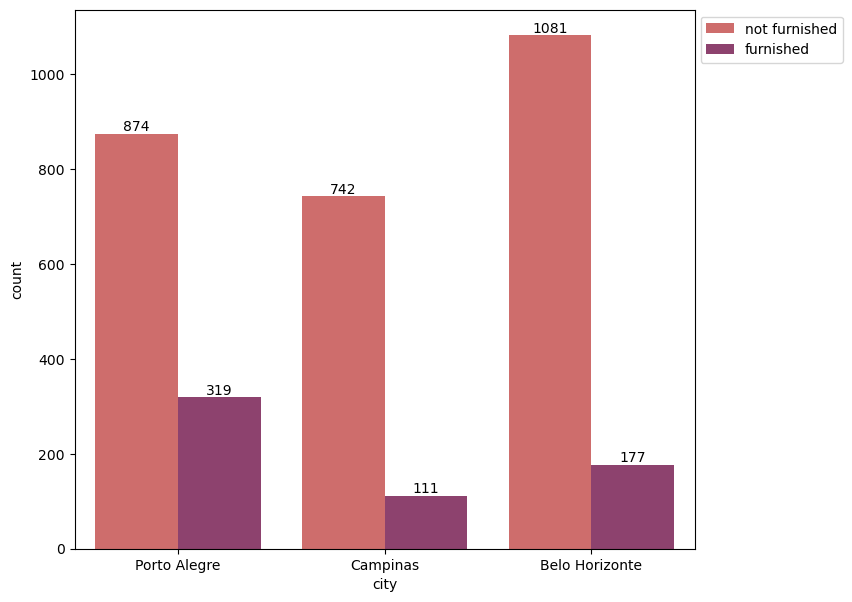

In [45]:
fig, ax = plt.subplots(figsize = (8, 7))
sns.countplot(x = "city", hue = "furniture", data = df, palette = 'flare')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.legend(bbox_to_anchor =(1.25, 1))
plt.show()

### ***Interpretation: Porto Alegre is more furnished and is suited for Bachelors who are more likely to relocate more often and cannot buy or transport furnitures frequently between cities.

### Campinas city is a balanced city with options of less furnished and furnished properties. Best suited for Mid-Sized families as they might settle in a place or more likey to relocate trying to find best places.

### Belo Horizonte has least furnished houses and is best suited for Large Families. These Families usually dont relocate much and can purchase their own furnitures of  choice.

### Based on Furniture:
###### Porto Alegre is best suitable for Bachelors
###### Campinas city is best for Mid Sized Families
###### Belo Horizonte is best for Large Families

## CAT NUM ANALYSIS: Categorical to continuous
Level 2: Bi-Variate Analysis

In [46]:
continuous  # to check the names of the continuous columns

['area',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

## Q5. Relationship of City with Rent

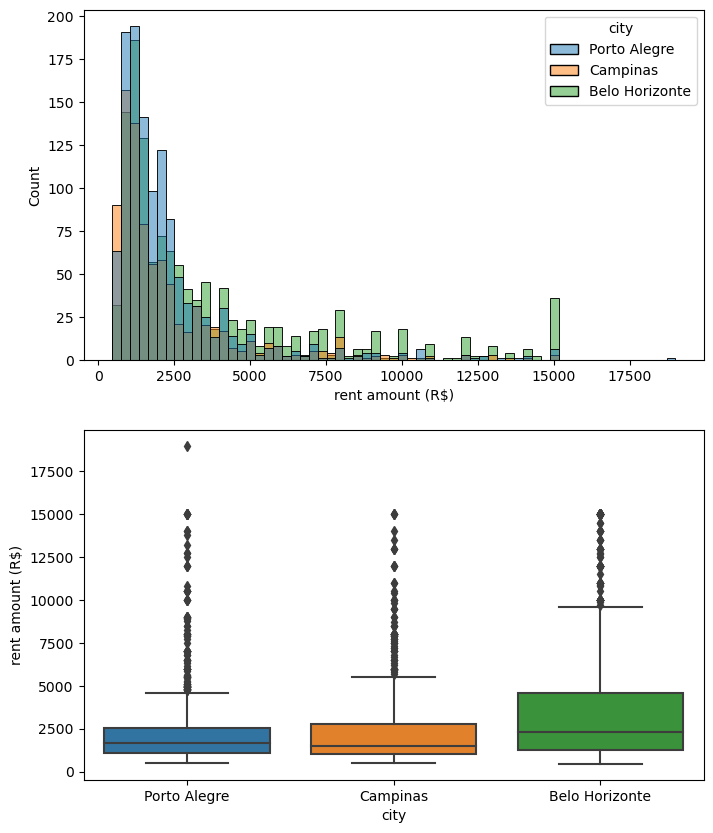

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
sns.histplot(x = df["rent amount (R$)"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["rent amount (R$)"], x = df["city"], ax = ax[1])
plt.show()

## ***Interpretation:  Porto Alegre has most of the Rent towards lesser side compared to other cities. Suitable for bachelors

## Campinas city rent is medium spread and is suitable for Mid-Sized Families. 

## Belo Horizonte has high spread of rent and is suitable for Large Families

### Based on Rent Amount:
###### Porto Alegre is best suitable for Bachelors
###### Campinas city is best for Mid Sized Families
###### Belo Horizonte is best for Large Families

## Q6. Relationship of City with Total Cost

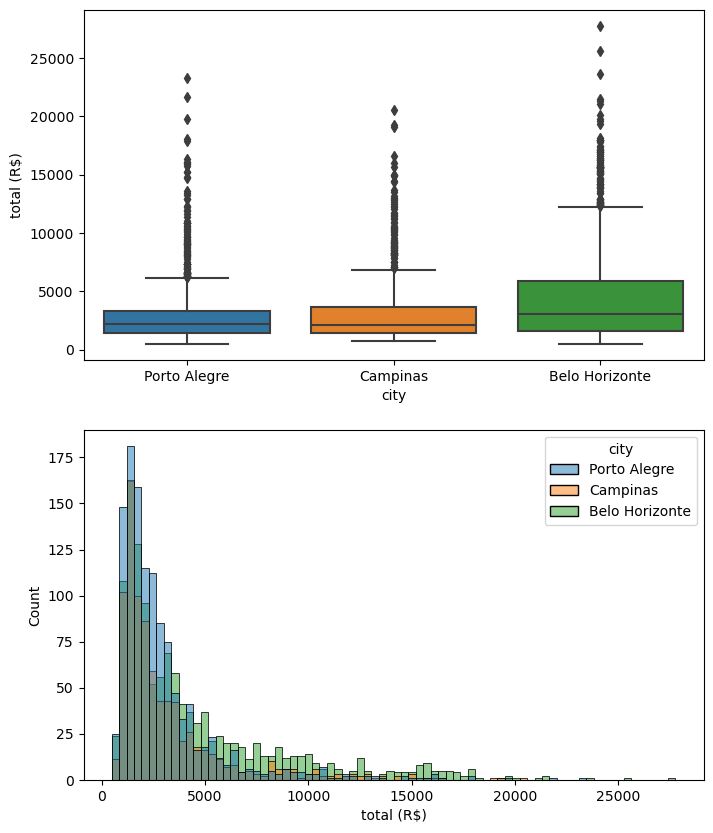

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
sns.histplot(x = df["total (R$)"], hue = df["city"], ax = ax[1])
sns.boxplot(y = df["total (R$)"], x = df["city"], ax = ax[0])
plt.show()

## ***Interpretation:  Porto Alegre has most of the data towards lesser side of Total cost compared to other cities. Suitable for bachelors

## Campinas city Total cost is medium spread and is suitable for Mid-Sized Families. 

## Belo Horizonte has high spread of total cost and is suitable for Large Families

### Based on Total Cost:
###### Porto Alegre is best suitable for Bachelors
###### Campinas city is best for Mid Sized Families
###### Belo Horizonte is best for Large Families

# Level-3 MultiVariate Analysis

## Q1. Relationship of City with Rooms and Rent

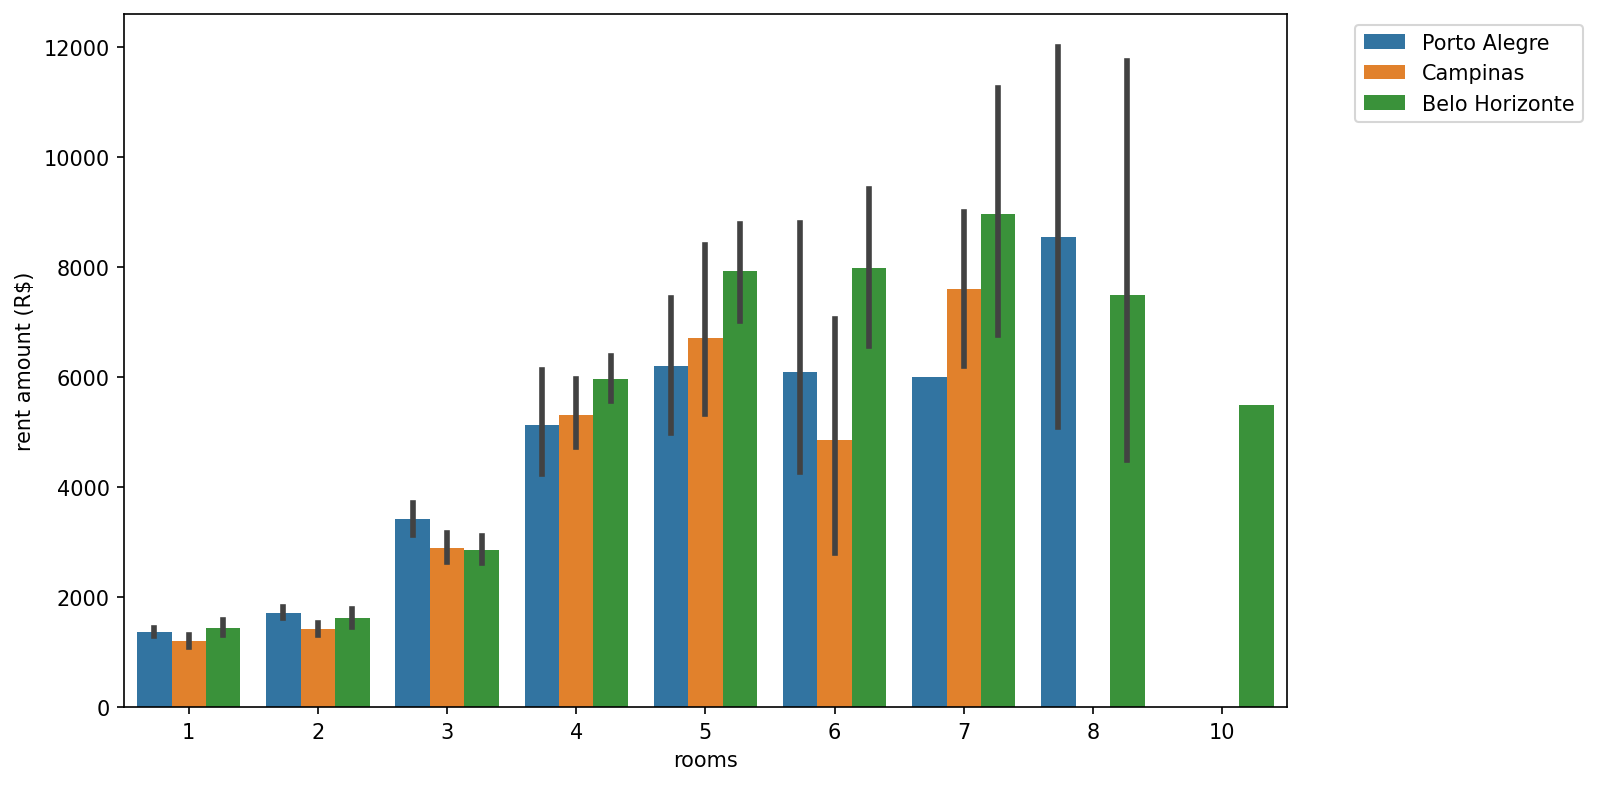

In [49]:
plt.figure(figsize = (10, 6), dpi = 150 )
sns.barplot(x = 'rooms', y = 'rent amount (R$)', data = df, hue = 'city')
plt.legend(bbox_to_anchor =(1.05, 1));

###### Properties with more number of rooms are available in Belo Horizonte City. More the number of rooms, higher is the price. Best suited for Large Families.

###### Less number of rooms are suitable for Bachelors and the dataset suggests that Porto Alegre city can be the best choice for Bachelors with less rent and less number of rooms.

###### Mid Sized Families can be flexible and can choose between Campinas city or Belo Horizonte City.

## Q2. Relationship of City with Bathrooms and Parking Spaces

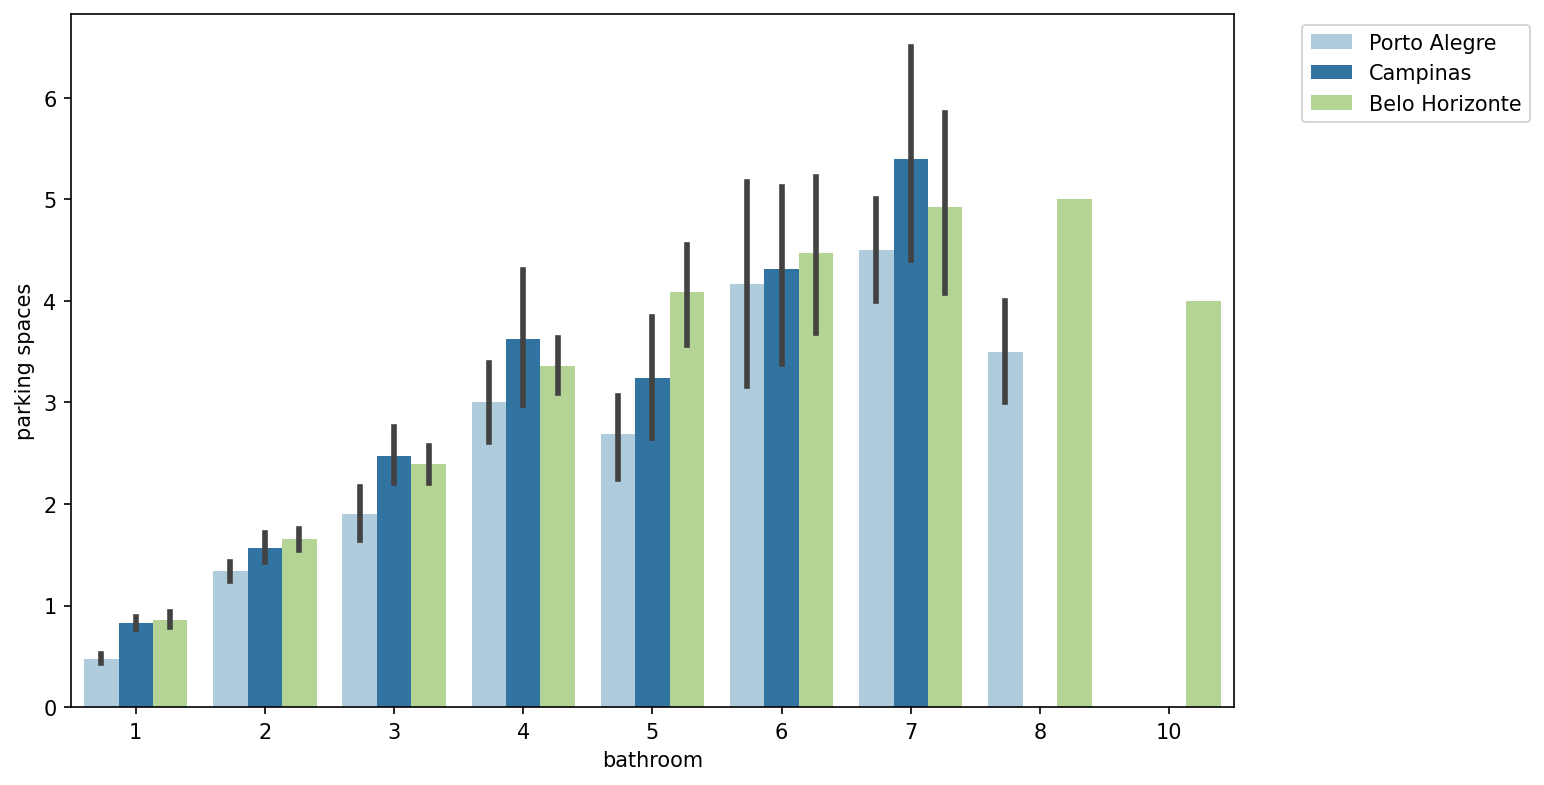

In [50]:
plt.figure(figsize = (10, 6), dpi = 150 )
sns.barplot(x = 'bathroom', y = 'parking spaces', data = df, hue = 'city', palette  = 'Paired')
plt.legend(bbox_to_anchor =(1.05, 1));

###### Choosing higher number of Bathrooms also give higher number of Parking spaces. This kind of choice is best suited for Large Families and the city that best offers this is Belo Horizonte.

###### Bachelors do not need more bathrooms and parking spaces. This condition is satisfied by Porto Alegre city and this can help Bachelors save money.

###### Mid-sized Families can choose between 2-3 or even 4 bathrooms and Campinas city offers best combnation of bathrooms and parking space from the dataset. 

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Conclusion :

## From Univariate, Bivariate and Multivariate Analysis:

### Bachelors: 
##### *Porto Alegre* is the best suited city for relocation with availability of 1-2 rooms, bathrooms and ample amount of parking spaces.

### Mid-Sized Family: 
##### *Campinas City* is the best suited city for relocation as they offer very balanced pricing of rooms and other facilities. Mid-sized families do not require the extreme low-end or top-end facilities and hence, Campinas city suits best!!

### Large Sized Familes: 
##### *Belo Horizonte* is the best suited city for relocation as this city offers everything in King-size like higher number of rooms, bathrooms, parking spaces. But it comes at a premium cost. However, large families have large average income and the families can handle the large expenses these properties has to offer. 

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------